In [1]:
%matplotlib inline

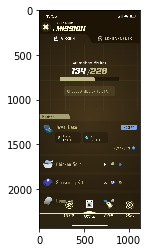

In [2]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
import numpy as np
img = cv2.imread("/Users/nanzou/Documents/GitHub/walkr_collect/mission/IMG_7840.PNG",1)
plt.imshow(img)


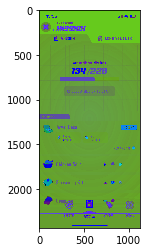

In [3]:
HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#cv2.imshow("imageHSV",HSV)
plt.imshow(HSV)

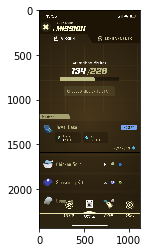

In [4]:
temp_end = cv2.imread("/Users/nanzou/Documents/GitHub/walkr_collect/mission/accept_button.png", 1)
temp_hsv = cv2.cvtColor(temp_end,cv2.COLOR_BGR2HSV)
res_end = cv2.matchTemplate(img, temp_hsv, cv2.TM_CCOEFF_NORMED)
end = cv2.minMaxLoc(res_end)[1]
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res_end)
cv2.rectangle(img, (0,max_loc[1]-50), (img.shape[1], max_loc[1] + 300), 0, 2)
plt.imshow(img)

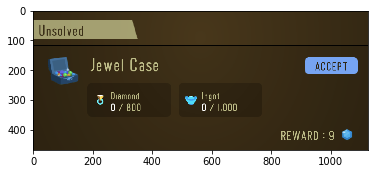

In [5]:
mission_img = img[img.shape[1]:(max_loc[1] + 300),0:(max_loc[1]-50)]
plt.imshow(mission_img)
#cv2.imwrite("/Users/nanzou/Documents/GitHub/walkr/mission/mission_range.png",img[0:(max_loc[1]-50)])

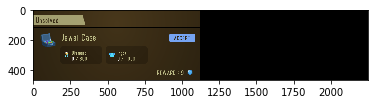

In [8]:
lower = [26]
upper = [32]
lower = np.array(lower, dtype="uint8")  # 颜色下限
upper = np.array(upper, dtype="uint8")  # 颜色上限
# 根据阈值找到对应颜色
mask = cv2.inRange(mission_img, lower, upper)    #查找处于范围区间的
#mask = 255-mask                          #留下铝材区域
output = cv2.bitwise_and(mission_img, mission_img, mask=mask)    #获取铝材区域
#bgroutput = cv2.cvtColor(output,cv2.COLOR_HSV2BGR)
# 展示图片
plt.imshow(np.hstack([mission_img, output]))
##jupyter lab 显示颜色与ide不同

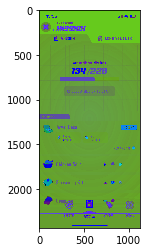

In [16]:
testd=cv2.cvtColor(img,cv2.COLOR_BGR2Lab)
#cv2.imshow("imageHSV",HSV)
plt.imshow(HSV)

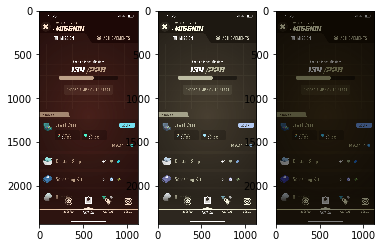

In [18]:
# H空间中，绿色比黄色的值高一点，所以给每个像素+15，黄色的树叶就会变绿
turn_green_hsv = HSV.copy()
turn_green_hsv[:, :, 0] = (turn_green_hsv[:, :, 0]+15) % 180
turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
plt.figure()
plt.subplot(131)
plt.imshow(turn_green_img)
 
# 减小饱和度会让图像损失鲜艳，变得更灰
colorless_hsv = HSV.copy()
colorless_hsv[:, :, 1] = 0.5 * colorless_hsv[:, :, 1]
colorless_img = cv2.cvtColor(colorless_hsv, cv2.COLOR_HSV2BGR)
plt.subplot(132)
plt.imshow( colorless_img)
 
# 减小明度为原来一半
darker_hsv = HSV.copy()
darker_hsv[:, :, 2] = 0.5 * darker_hsv[:, :, 2]
darker_img = cv2.cvtColor(darker_hsv, cv2.COLOR_HSV2BGR)
plt.subplot(133)
plt.imshow(darker_img)
plt.show()
